In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exemplo 1:

[3.04870721e-06 6.09446500e-06 9.13432678e-06 1.21653517e-05
 1.51846074e-05 1.81891730e-05 2.11761417e-05 2.41426239e-05
 2.70857497e-05 3.00026718e-05 3.28905682e-05 3.57466451e-05
 3.85681394e-05 4.13523215e-05 4.40964980e-05 4.67980139e-05
 4.94542558e-05 5.20626539e-05 5.46206847e-05 5.71258735e-05
 5.95757968e-05 6.19680843e-05 6.43004217e-05 6.65705526e-05
 6.87762808e-05 7.09154723e-05 7.29860577e-05 7.49860339e-05
 7.69134659e-05 7.87664890e-05 8.05433107e-05 8.22422119e-05
 8.38615492e-05 8.53997557e-05 8.68553435e-05 8.82269044e-05
 8.95131115e-05 9.07127204e-05 9.18245706e-05 9.28475864e-05
 9.37807783e-05 9.46232432e-05 9.53741663e-05 9.60328211e-05
 9.65985703e-05 9.70708666e-05 9.74492531e-05 9.77333638e-05
 9.79229237e-05 9.80177496e-05 9.80177496e-05 9.79229237e-05
 9.77333638e-05 9.74492531e-05 9.70708666e-05 9.65985703e-05
 9.60328211e-05 9.53741663e-05 9.46232432e-05 9.37807783e-05
 9.28475864e-05 9.18245706e-05 9.07127204e-05 8.95131115e-05
 8.82269044e-05 8.685534

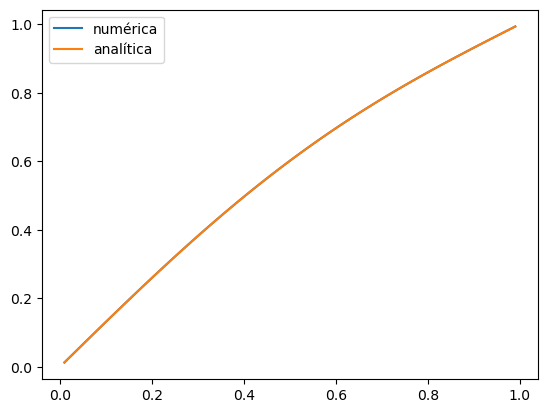

In [10]:
N = 100
h = 1.0/(N+1)
u_left = 0
u_right = 1
x = np.zeros(N)
u = np.zeros(N)
ue = np.zeros(N)
f = np.zeros(N)
A = np.zeros((N,N))

for i in range(1,N+1):
    x[i-1] = i*h
    f[i-1] = h* h* np.sin(np.pi*x[i-1])
    ue[i-1] = (np.sin(np.pi*x[i-1]))/np.pi/np.pi + x[i-1]
    if i>1:
        A[i-1,i-2] = -1
    else:
        f[i-1] = f[i-1] + u_left
    A[i-1,i-1] = 2.0
    if i<N:
        A[i-1,i] = -1
    else:
        f[i-1] = f[i-1] + u_right
u = np.linalg.solve(A,f)
plt.plot(x,u,label="numérica")
plt.plot(x,ue,label="analítica")
plt.legend();
print(f)

In [11]:
def advection_diffusion(u0, u1, h, eps):
    N = int(1/h - 1)
    A = np.zeros((N,N))
    u = np.zeros(N)
    ue = np.zeros(N)
    f = np.zeros(N)
    x = np.zeros(N)
    for i in range(1,N+1):
        x[i-1] = i*h
        f[i-1] = h**2 * ((np.exp(x[i-1]/eps) - 1)/ (np.exp(1/eps) -1))
        ue[i-1] = (np.exp(x[i-1]/eps) - 1)/ (np.exp(1/eps) -1)
        if i > 1:
            A[i-1,i-2] = (-eps/h - 1/2)
        else:
            f[i-1] = f[i-1] - (-eps/h - 1/2) * u0
        A[i-1,i-1] = (2*eps/h)
        if i < N:
            A[i-1,i] = (-eps/h + 1/2)
        else:
            f[i-1] = f[i-1] - (-eps/h + 1/2) * u1
    u = np.linalg.solve(A,f)
    print(A)
    return u, ue

[[ 2.  -0.5  0.  ...  0.   0.   0. ]
 [-1.5  2.  -0.5 ...  0.   0.   0. ]
 [ 0.  -1.5  2.  ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  2.  -0.5  0. ]
 [ 0.   0.   0.  ... -1.5  2.  -0.5]
 [ 0.   0.   0.  ...  0.  -1.5  2. ]]


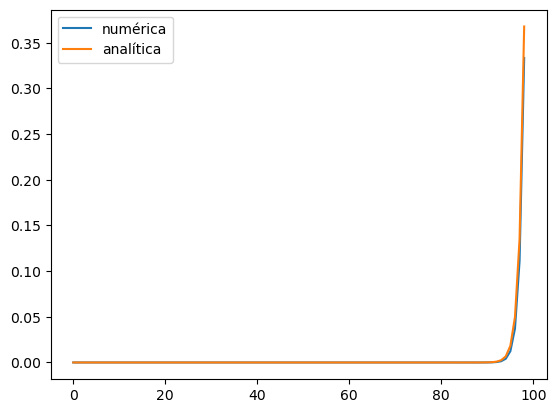

In [12]:
h = 0.01
u0 = 0
u1 = 1
epsilon = 0.01
u, ue = advection_diffusion(u0, u1, h, epsilon)
plt.plot(u,label="numérica")
plt.plot(ue,label="analítica")
plt.legend()
plt.show()